## Lesson1: PytorchでDatasetを読み込む
- Pytorchでは、 *Dataset*とDatasetを読み込みバッチを作成する*DataLoader*が学習に必要
- 本演習では、Datasetを作成するスクリプトとDataLoaderで読み込むスクリプトを作ります

- **Step1. 下準備**
    - 公式サイト(https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) にて、Section: Load DataのNOTEにある*here*をクリックしてzipファイルをダウンロード
    - zipファイルを解凍し、画像ディレクトリ*hymenoptera_data*を現在開いているIPYNBファイルと同じところに配置
        - **(dir)** Lesson1_DataLoader
            - L*(file)* DataLoader.ipynb
            - L**(dir)** hymenoptera_data
                - L**(dir)** train
                - L**(dir)** val

- **Step2. Datasetクラスの作成**
    - ここからPythonで作成
    - まずはソースとなるDatasetクラスを、pytorchのDatasetクラスを継承して作成

In [2]:
# 本セクションで使うモジュールたち
import os
from PIL import Image
Image.MAX_IMAGE_PIXELS = None # サイズ読み込みエラー対策のおまじない
import torch.utils.data # Datasetクラスを継承するのに使用
import torchvision.transforms as transforms # 画像の前処理に使用

In [3]:
# Datasetクラスを作るよ！

In [10]:
class AntBee_Dataset(torch.utils.data.Dataset):
    def __init__(self, mode):
        super(torch.utils.data.Dataset, self).__init__() #torch.utils.data.Datasetの継承
        # Initialize setting
        self.mode = mode # trainモードかvalitationモードかの判定に使用(str型)
        self.src_root = 'hymenoptera_data' # ソース画像ディレクトリまでのpath
        self.transform = self._transform() # 画像前処理の関数
        # Get img paths and set label
        self.img_paths_list = []
        self.label_list = []
        self.label_dic = {}
        src_dir = os.path.join(self.src_root, mode)
        dir_list = os.listdir(src_dir)
        for idx,dir in enumerate(dir_list):
            # Resister label
            self.label_dic[idx] = dir # {0:ants, 1:bees}となるように代入
            # Get img paths
            img_list = os.listdir(os.path.join(src_dir, dir))
            for img_name in img_list:
                img_path = os.path.join(src_dir, dir, img_name)
                self.img_paths_list.append(img_path) # 画像ファイルまでのパスをappend
                self.label_list.append(idx) # label番号をappend
                
    def __len__(self): # ! Datasetをつくるにあたって必要 !
        return len(self.label_list)
    
    def __getitem__(self, index): # ! Dataloaderで読みだすのに必要 !
        # Read img path & label
        img_path = self.img_paths_list[index]
        label = self.label_list[index]
        # Load img and proceed
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        # 辞書型でreturn
        # img: Tensor型の画像データ(ch, h, w)
        return {'img':img, 'label':label, 'name':self.label_dic[label]}
        
    def _transform(self): # 画像データの前処理に
        transform = transforms.Compose([
            transforms.Resize((224, 224), Image.BICUBIC), # 画像のリサイズ (Image.BICUBICはリサイズ時の補完関数)
            transforms.ToTensor(), # 画像のピクセル値を正規化 [0, 255] -> [0, 1]
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)) # [0, 1] -> [-1, 1]の値をとるように正規化(標準正規分布)
        ])
        return transform
        

In [11]:
dataset = AntBee_Dataset(mode='train')
print(dataset)

- **Step3. DataLoaderインスタンスでAntBee_Datasetを読み込む**
    - pytorchのDataLoaderオブジェクトは、Datasetクラスやバッチサイズを引数にとり、そのデータセットのiteratorを返す
    - iteratorは繰り返し要素を取り出してくれるオブジェクト
    - 学習回数の数え方に関して
        - 1 iterator = 1 iterator内のbatch size(データ数) 
        - 1 epoch = 1 iterator × 全データを括るのに必要なバッチサイズの数

In [12]:
# 理屈はともかくやってみよう！

In [13]:
train_dataset = AntBee_Dataset(mode='train') # train画像データセット用
val_dataset = AntBee_Dataset(mode='val') # validation画像データセット用

In [14]:
# DataLoaderインスタンスの作成
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=5, shuffle=True
)

- train_loaderの(主につかう)引数について
    - dataset: torch.utils.data.Datasetを継承したDatasetオブジェクト
    - batch_size: 1イテレーター毎に呼び出すデータの数(ミニバッチ)
    - shuffle: 1エポック毎に全データをシャッフルするかしないか
- もっと知りたいかたはこちら→ https://pytorch.org/docs/stable/data.html

In [15]:
train_data = iter(train_loader).next()
print(train_data)

{'img': tensor([[[[-0.1843, -0.1451, -0.1137,  ...,  0.1216,  0.1686,  0.1922],
          [-0.1686, -0.1294, -0.1294,  ...,  0.1373,  0.1843,  0.2078],
          [-0.1608, -0.1373, -0.1294,  ...,  0.1686,  0.1922,  0.2078],
          ...,
          [ 0.1451,  0.1529,  0.1373,  ...,  0.2314,  0.3176,  0.1059],
          [ 0.1373,  0.1373,  0.1059,  ...,  0.2314,  0.1686,  0.0196],
          [ 0.1294,  0.1294,  0.1059,  ...,  0.1529,  0.1608,  0.0902]],

         [[ 0.0353,  0.0824,  0.1137,  ...,  0.4510,  0.4667,  0.4745],
          [ 0.0588,  0.0980,  0.0902,  ...,  0.4588,  0.4824,  0.4902],
          [ 0.0824,  0.0824,  0.0667,  ...,  0.4745,  0.4824,  0.4902],
          ...,
          [ 0.2784,  0.2863,  0.2863,  ...,  0.5451,  0.6471,  0.4824],
          [ 0.2863,  0.2941,  0.2863,  ...,  0.5529,  0.5451,  0.4353],
          [ 0.2941,  0.3098,  0.3020,  ...,  0.5137,  0.5137,  0.4588]],

         [[-0.8980, -0.8902, -0.8745,  ..., -0.6471, -0.6235, -0.5922],
          [-0.9059, -0

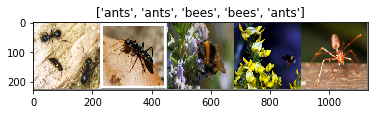

In [16]:
# 実際の画像はどのように読まれているのか？ Let's visualize!
import matplotlib.pyplot as plt
import torchvision

def imshow(inputs, title=None):
    inputs = inputs.numpy() # Tensor型からnumpy型に変換
    inputs = inputs.transpose((1, 2, 0)) # [ch, h, w] -> [h, w, ch]に並び替え
    inputs = 0.5*inputs + 0.5 # [-1, 1] -> [0, 1]に De-Normalization
    plt.imshow(inputs)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
        
train_data = iter(train_loader).next()
imgs, label_names = train_data['img'], train_data['name']
img_grid = torchvision.utils.make_grid(imgs) # ひとまとまりの画像を作ってくれる
imshow(img_grid, label_names)

### 演習問題1
#### Q1. train_loaderにてbatch_sizeの値を変えるとどうなるか調べよう
#### Q2. Datasetクラスの*＿＿getitem＿＿()*にて、変更を加えindexも返すようにしよう
#### Q3. Q2ができたら、DataLoaderインスタンスtrain_loader, val_loaderを作成し、イテレーターで"img","name","index"を表示させてみよう

- **Step4. 1エポック分のデータを読み出す** 

In [17]:
# For文をつかってすべてのイテレーターを読み出す
for i, data in enumerate(train_loader):
    print('iter:{}'.format(i))
    print('\t batch_size:{}'.format(data['img'].size(0)))
    print('\t label  :{}'.format(data['label']))
    print('\t content:{}'.format(data['name']))

iter:0
	 batch_size:5
	 label  :tensor([1, 1, 0, 1, 1])
	 content:['bees', 'bees', 'ants', 'bees', 'bees']
iter:1
	 batch_size:5
	 label  :tensor([0, 0, 0, 1, 0])
	 content:['ants', 'ants', 'ants', 'bees', 'ants']
iter:2
	 batch_size:5
	 label  :tensor([1, 1, 0, 0, 1])
	 content:['bees', 'bees', 'ants', 'ants', 'bees']
iter:3
	 batch_size:5
	 label  :tensor([0, 0, 1, 0, 0])
	 content:['ants', 'ants', 'bees', 'ants', 'ants']
iter:4
	 batch_size:5
	 label  :tensor([1, 1, 1, 1, 0])
	 content:['bees', 'bees', 'bees', 'bees', 'ants']
iter:5
	 batch_size:5
	 label  :tensor([1, 0, 1, 0, 1])
	 content:['bees', 'ants', 'bees', 'ants', 'bees']
iter:6
	 batch_size:5
	 label  :tensor([1, 1, 0, 1, 1])
	 content:['bees', 'bees', 'ants', 'bees', 'bees']
iter:7
	 batch_size:5
	 label  :tensor([0, 0, 1, 0, 0])
	 content:['ants', 'ants', 'bees', 'ants', 'ants']
iter:8
	 batch_size:5
	 label  :tensor([0, 0, 0, 0, 1])
	 content:['ants', 'ants', 'ants', 'ants', 'bees']
iter:9
	 batch_size:5
	 label  :tenso

### 演習問題2
#### Q1. train_loader, val_loaderにそれぞれあるイテレーターをすべて読み出してみよう
##### Tips: イテレーターの数の違いに注目！
#### Q2. 上記のコードに修正を加えて、データを読み出すのを10epoch行おう
##### Hint: For分を加えるだけ！

### 演習問題3 自分でDatasetを作ってみよう
#### Q1. Stanford Dogs Dataset (http://vision.stanford.edu/aditya86/ImageNetDogs/) から*Images*をダウンロードし、解凍しよう
##### Tips: tarファイルは*7-zip*などのアプリケーションで解凍できます
#### Q2. ダウンロードした画像データセットにて、犬の種類名のディレクトリとそのディレクトリ内に犬の画像が格納されている。pytorchでDatasetクラスを作成し、＿＿getitem＿＿メソッドに以下の要素を返すようにしよう
#####   **・img: 読み込んだ画像をTensor型に変換したデータ** ※画像の前処理に関しては、例題で作成したものと同じものを使う
#####   **・label: 犬の種類名を{0: チワワ, 1:シーズー}のようにidで紐づけたデータ** ※犬の種類名と対応するidの番号に関しては指定しない、自由につけてよし
#####   **・name: 読み込まれた犬の種類名を表したstrデータ**
#### Q3. 作成したDatasetを読み込むDataLoaderオブジェクトをつくり、イテレータでデータを読み出そう